# Census Income Dataset

## Overview
This dataset is used to predict whether an individual's income exceeds $50K/year based on census data.

- **Creators**: Barry Becker & Ronny Kohavi
- **[Dataset Source](https://archive.ics.uci.edu/dataset/2/adult)**

## Variables

1. **age**: This is a continuous variable representing the age of the individual.

2. **workclass**: This categorical variable represents the type of workclass an individual belongs to. Possible values include:
   - Private
   - Self-emp-not-inc
   - Self-emp-inc
   - Federal-gov
   - Local-gov
   - State-gov
   - Without-pay
   - Never-worked

3. **fnlwgt**: This is a continuous variable and stands for "final weight." It represents the number of people the census believes the entry represents.

4. **education**: This categorical variable represents the highest level of education an individual has completed. Possible values include:
   - Bachelors
   - Some-college
   - 11th
   - HS-grad
   - Prof-school
   - Assoc-acdm
   - Assoc-voc
   - 9th
   - 7th-8th
   - 12th
   - Masters
   - 1st-4th
   - 10th
   - Doctorate
   - 5th-6th
   - Preschool

5. **education-num**: This is a continuous variable and corresponds to the numerical representation of education levels.

6. **marital-status**: This categorical variable represents the marital status of the individual. Possible values include:
   - Married-civ-spouse
   - Divorced
   - Never-married
   - Separated
   - Widowed
   - Married-spouse-absent
   - Married-AF-spouse

7. **occupation**: This categorical variable represents the type of occupation the individual is engaged in. Possible values include:
   - Tech-support
   - Craft-repair
   - Other-service
   - Sales
   - Exec-managerial
   - Prof-specialty
   - Handlers-cleaners
   - Machine-op-inspct
   - Adm-clerical
   - Farming-fishing
   - Transport-moving
   - Priv-house-serv
   - Protective-serv
   - Armed-Forces

8. **relationship**: This categorical variable represents the individual's relationship status. Possible values include:
   - Wife
   - Own-child
   - Husband
   - Not-in-family
   - Other-relative
   - Unmarried

9. **race**: This categorical variable represents the individual's race. Possible values include:
   - White
   - Asian-Pac-Islander
   - Amer-Indian-Eskimo
   - Other
   - Black

10. **sex**: This categorical variable represents the individual's gender. Possible values are Female and Male.

11. **capital-gain**: This is a continuous variable representing capital gains.

12. **capital-loss**: This is a continuous variable representing capital losses.

13. **hours-per-week**: This is a continuous variable representing the number of hours an individual works per week.

14. **native-country**: This categorical variable represents the native country of the individual. Possible values include a variety of countries such as the United-States, Cambodia, England, Puerto-Rico, and more.

## Target Variable
- **income**: This target variable is typically represented as `>50K` and `<=50K`.

## Goal
The primary objective of this dataset is to make predictions about an individual's annual income. We want to determine whether a person's income exceeds $50K/year based on various factors captured in the census data. This task is framed as a classification problem where we categorize individuals into two income groups: `>50K` or `<=50K`. Our ultimate aim is to develop a predictive model that can accurately classify and predict income levels.

#### Below are the steps which we will be basically following:

1. [Step 1: Reading and Understanding the Data](#1)
1.  [Step 2: Cleaning the Data](#2)
    - Missing Value check
    - Data type check
    - Duplicate check
    - Typo check
1. [Step 3: Data Visualization](#3)
    - Countplot
    - Distplot
    - Pairplot
1. [Step 4: Data Preparation](#4) 
   - Dummy Variable
1. [Step 5: Splitting the Data into Training and Testing Sets](#5)
   - Rescaling
   - Undersampling and Oversampling
1. [Step 6: Building a Linear Model](#6)
   - Model Selection
     * Logistic Regression
     * KNN
     * Random Forest
     * Naive Bayes
     * LDA
     * QDA
1. [Step 7: Final Model Evaluation](#7)
   - ROC Curve and AUC
   - Precision
   - Recall

In [1]:
# importing library to import data
from ucimlrepo import fetch_ucirepo 

# import all libraries and dependencies for dataframe
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from datetime import datetime, timedelta

# import all libraries and dependencies for data visualization
pd.options.display.float_format='{:.4f}'.format
plt.rcParams['figure.figsize'] = [8,8]
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_colwidth', -1) 
sns.set(style='darkgrid')
import matplotlib.ticker as ticker
import matplotlib.ticker as plticker

# import all libraries and dependencies for machine learning
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.base import TransformerMixin
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import average_precision_score
from sklearn.metrics import roc_curve, roc_auc_score, precision_recall_curve, auc
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

<a id="1"></a> <br>
## Step 1 : Reading and Understanding the Data

In [2]:
"""# We can directly work with the 'census data' dataset using the following library, 
so there's no need to import the data.

pip install ucimlrepo

from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
adult = fetch_ucirepo(id=2) 
  
# data (as pandas dataframes) 
X = adult.data.features 
y = adult.data.targets 
  
# metadata 
print(adult.metadata) 
  
# variable information 
print(adult.variables) """

"# We can directly work with the 'census data' dataset using the following library, \nso there's no need to import the data.\n\npip install ucimlrepo\n\nfrom ucimlrepo import fetch_ucirepo \n  \n# fetch dataset \nadult = fetch_ucirepo(id=2) \n  \n# data (as pandas dataframes) \nX = adult.data.features \ny = adult.data.targets \n  \n# metadata \nprint(adult.metadata) \n  \n# variable information \nprint(adult.variables) "

In [3]:
# We don't need to import the dataset. We can directly retrieve the dataset using the given library.
#!pip install ucimlrepo

In [4]:
# fetch dataset 
adult = fetch_ucirepo(id=2) 
  
# data (as pandas dataframes) 
X = adult.data.features 
y = adult.data.targets 
df_adult = pd.concat([X, y], axis=1)

In [5]:
train = df_adult.sample(frac=0.8, random_state=42)
test = df_adult.drop(train.index)

In [6]:
train.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
7762,18,Private,423024,HS-grad,9,Never-married,Other-service,Not-in-family,White,Male,0,0,20,United-States,<=50K
23881,17,Private,178953,12th,8,Never-married,Sales,Own-child,White,Female,0,0,20,United-States,<=50K
30507,25,Local-gov,348986,HS-grad,9,Never-married,Handlers-cleaners,Other-relative,Black,Male,0,0,40,United-States,<=50K
28911,20,Private,218215,Some-college,10,Never-married,Sales,Own-child,White,Female,0,0,30,United-States,<=50K
19484,47,Private,244025,HS-grad,9,Never-married,Machine-op-inspct,Unmarried,Amer-Indian-Eskimo,Male,0,0,56,Puerto-Rico,<=50K


In [7]:
# shape of the data
train.shape

(39074, 15)

In [8]:
# information of the data
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39074 entries, 7762 to 19797
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             39074 non-null  int64 
 1   workclass       38276 non-null  object
 2   fnlwgt          39074 non-null  int64 
 3   education       39074 non-null  object
 4   education-num   39074 non-null  int64 
 5   marital-status  39074 non-null  object
 6   occupation      38274 non-null  object
 7   relationship    39074 non-null  object
 8   race            39074 non-null  object
 9   sex             39074 non-null  object
 10  capital-gain    39074 non-null  int64 
 11  capital-loss    39074 non-null  int64 
 12  hours-per-week  39074 non-null  int64 
 13  native-country  38849 non-null  object
 14  income          39074 non-null  object
dtypes: int64(6), object(9)
memory usage: 4.8+ MB


In [9]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
age,39074.0000,38.6370,13.7100,17.0000,28.0000,37.0000,48.0000,90.0000
fnlwgt,39074.0000,189970.4625,105710.7889,12285.0000,117861.2500,178615.0000,237718.2500,1490400.0000
education-num,39074.0000,10.0759,2.5753,1.0000,9.0000,10.0000,12.0000,16.0000
capital-gain,39074.0000,1089.3361,7573.6146,0.0000,0.0000,0.0000,0.0000,99999.0000
capital-loss,39074.0000,87.1242,402.3633,0.0000,0.0000,0.0000,0.0000,4356.0000
hours-per-week,39074.0000,40.4357,12.4025,1.0000,40.0000,40.0000,45.0000,99.0000


<a id="2"></a> <br>
## Step 2: Cleaning the Data

We need to do some basic cleansing activity in order to feed our model the correct data.

#### Train Set

In [10]:
# Calculating the Missing Values % contribution in DF

df_null = train.isna().mean().round(4) * 100

df_null.sort_values(ascending=False).head()

occupation       2.0500
workclass        2.0400
native-country   0.5800
age              0.0000
fnlwgt           0.0000
dtype: float64

#### Insights: 
- In the dataset, there are three categorical columns with missing values. It's essential to address these missing values before building our predictive model. 

#### Here are some common strategies, we can use to handle missing categorical data:

1. **Imputation**: Replace missing values with the mode (most frequent category) of the respective column. This is a simple and effective approach, especially when the missing values are few.

2. **Create a New Category**: If it makes sense for the specific column, you can create a new category that represents missing values. This can be a meaningful option when missing values carry information.

3. **Deletion**: In cases where the missing values are extensive, you may consider removing rows or columns with missing values. However, this should be done cautiously, as it might result in a loss of valuable data.

The choice of how to handle missing values should be made based on the specific characteristics of the data and the goals of your analysis.


In [11]:
train[['workclass', 'occupation', 'native-country']].isna().sum()

workclass         798
occupation        800
native-country    225
dtype: int64

In [12]:
# Using imputation method (i.e., Replace missing values with the mode (most frequent category) of the respective column), to fixed missing value.

# Replace missing values with the mode in 'workclass' column
train['workclass'].fillna(train['workclass'].mode()[0], inplace=True)

# Replace missing values with the mode in 'occupation' column
train['occupation'].fillna(train['occupation'].mode()[0], inplace=True)

# Replace missing values with the mode in 'native-country' column
train['native-country'].fillna(train['native-country'].mode()[0], inplace=True)

In [13]:
# Checking missing value again

train[train.isna().any(axis=1)]

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income


In [14]:
# Datatypes

train.dtypes

age               int64 
workclass         object
fnlwgt            int64 
education         object
education-num     int64 
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain      int64 
capital-loss      int64 
hours-per-week    int64 
native-country    object
income            object
dtype: object

In [15]:
# checking for duplicates

train.duplicated().sum()

20

In [16]:
train.drop_duplicates(inplace=True, keep='first')

In [17]:
train.loc[train.duplicated()]

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income


In [18]:
train.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

In [19]:
# Segregation of Numerical and Categorical Variables/Columns

train_cat_col = train.select_dtypes(include=['object']).columns
train_num_col = train.select_dtypes(exclude=['object']).columns
df_train_cat = train[train_cat_col]
df_train_num = train[train_num_col]

In [20]:
#Find out distinct values for each categorical feature

for feature in train_cat_col:
    print(feature,':', train[feature].nunique())

workclass : 9
education : 16
marital-status : 7
occupation : 15
relationship : 6
race : 5
sex : 2
native-country : 42
income : 4


In [21]:
# Fixing the typos
train['income'].unique()

array(['<=50K', '<=50K.', '>50K', '>50K.'], dtype=object)

In [22]:
# Renaming the typo errors in income variable

train['income'] = train['income'].replace({'<=50K.':'<=50K', '>50K.': '>50K'})

In [23]:
train['income'].nunique()

2

#### Test Set

In [24]:
# Calculating the Missing Values % contribution in DF

df_null = test.isna().mean().round(4) * 100

df_null.sort_values(ascending=False).head()

occupation       1.7000
workclass        1.6900
native-country   0.5000
age              0.0000
fnlwgt           0.0000
dtype: float64

In [25]:
test[['workclass', 'occupation', 'native-country']].isna().sum()

workclass         165
occupation        166
native-country    49 
dtype: int64

In [26]:
# Using imputation method (i.e., Replace missing values with the mode (most frequent category) of the respective column), to fixed missing value.

# Replace missing values with the mode in 'workclass' column
test['workclass'].fillna(test['workclass'].mode()[0], inplace=True)

# Replace missing values with the mode in 'occupation' column
test['occupation'].fillna(test['occupation'].mode()[0], inplace=True)

# Replace missing values with the mode in 'native-country' column
test['native-country'].fillna(test['native-country'].mode()[0], inplace=True)

In [27]:
# Checking missing value again

test[test.isna().any(axis=1)]

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income


In [28]:
# Datatypes

test.dtypes

age               int64 
workclass         object
fnlwgt            int64 
education         object
education-num     int64 
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain      int64 
capital-loss      int64 
hours-per-week    int64 
native-country    object
income            object
dtype: object

In [29]:
# checking for duplicates

test.duplicated().sum()

0

In [30]:
# Segregation of Numerical and Categorical Variables/Columns

test_cat_col = test.select_dtypes(include=['object']).columns
test_num_col = test.select_dtypes(exclude=['object']).columns
df_test_cat = test[test_cat_col]
df_test_num = test[test_num_col]

In [31]:
#Find out distinct values for each categorical feature

for feature in test_cat_col:
    print(feature,':', test[feature].nunique())

workclass : 9
education : 16
marital-status : 7
occupation : 15
relationship : 6
race : 5
sex : 2
native-country : 41
income : 4


In [32]:
test['income'].unique()

array(['<=50K', '>50K', '<=50K.', '>50K.'], dtype=object)

In [33]:
# Renaming the typo errors in income variable

test['income'] = test['income'].replace({'<=50K.':'<=50K', '>50K.': '>50K'})

In [34]:
test['income'].nunique()

2

<a id="3"></a> <br>
## Step 3: Visualising the Data

- Here we will identify if some predictors directly have a strong association with the outcome variable `income`.

In [35]:
#df_adult['income'].value_counts('f')
print('Income <= 50K:', round(train['income'].value_counts()[0]/len(train) * 100,2), '%')
print('Income > 50K:', round(train['income'].value_counts()[1]/len(train) * 100,2), '%')

Income <= 50K: 76.07 %
Income > 50K: 23.93 %


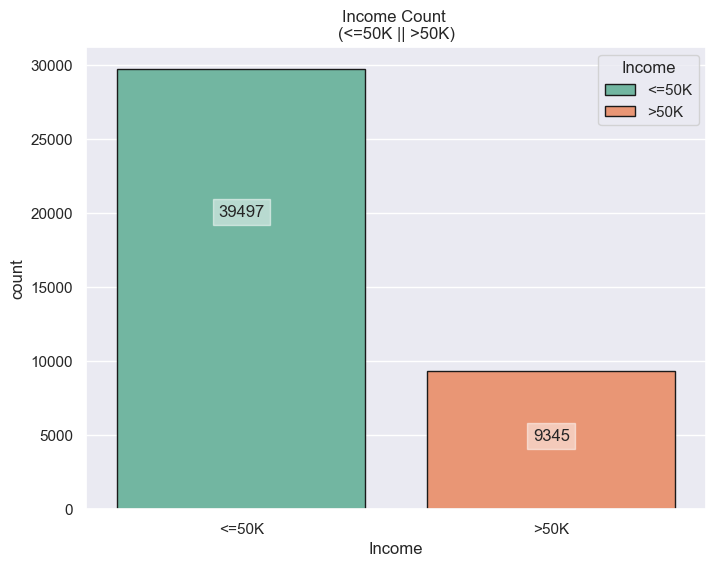

In [36]:
plt.figure(figsize=(8, 6))
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i]//2,y[i], ha = 'center',
                 bbox=dict(facecolor = 'white', alpha = .5))
sns.countplot(data=train, x='income', hue='income', edgecolor='k', palette='Set2')
x = ['<=50', '>50']
y = [df_adult.shape[0]-np.sum(train['income']=='>50K'), np.sum(train['income']=='>50K')]
addlabels(x, y)
plt.title('Income Count \n(<=50K || >50K)')
plt.xlabel('Income')
plt.legend(title="Income", labels=["<=50K", ">50K"])
plt.show()

#### Insight
* The number of people with income less than or equal to 50K is higher than the number of people with income greater than 50K.

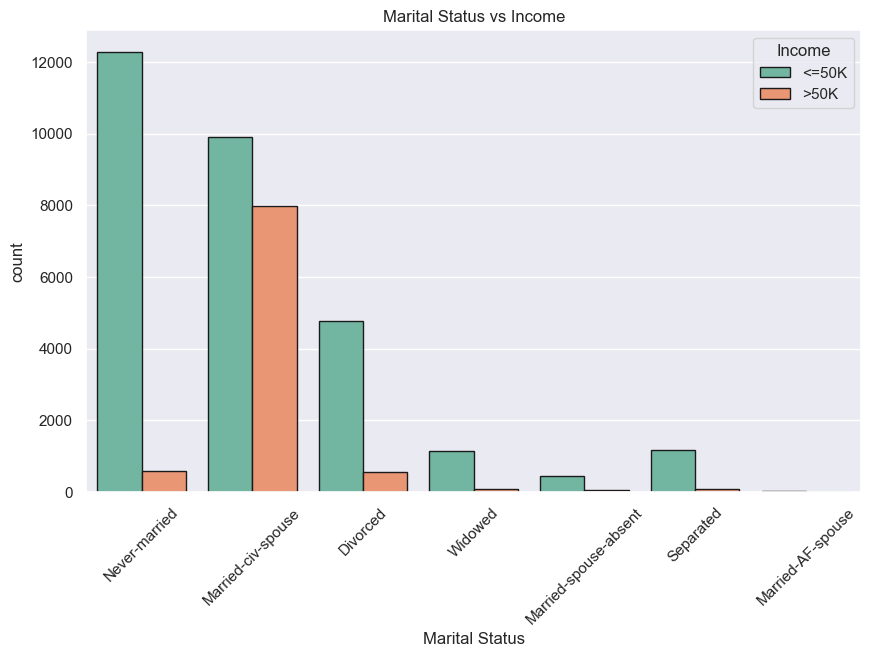

In [37]:
plt.figure(figsize=(10, 6)) 
ax = sns.countplot(data=train, x='marital-status', hue='income', edgecolor='k', palette='Set2')
ax.set_title('Marital Status vs Income')
ax.set_xlabel('Marital Status')
plt.xticks(rotation=45)
plt.legend(title='Income', labels=['<=50K', '>50K'])
plt.show()

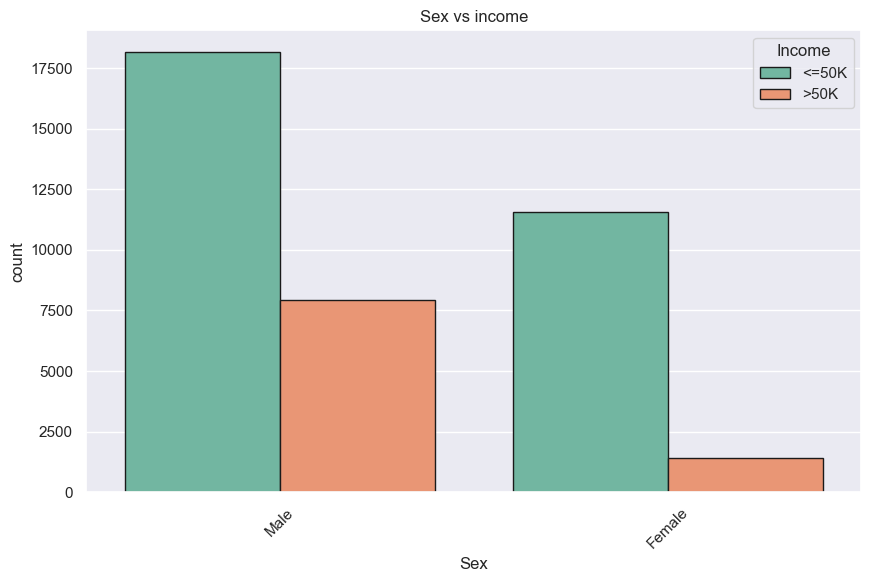

In [38]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=train, x='sex', hue='income', edgecolor='k', palette='Set2')
ax.set_title('Sex vs income')
ax.set_xlabel('Sex')
plt.xticks(rotation=45)
plt.legend(title='Income', labels=['<=50K', '>50K'])
plt.show()

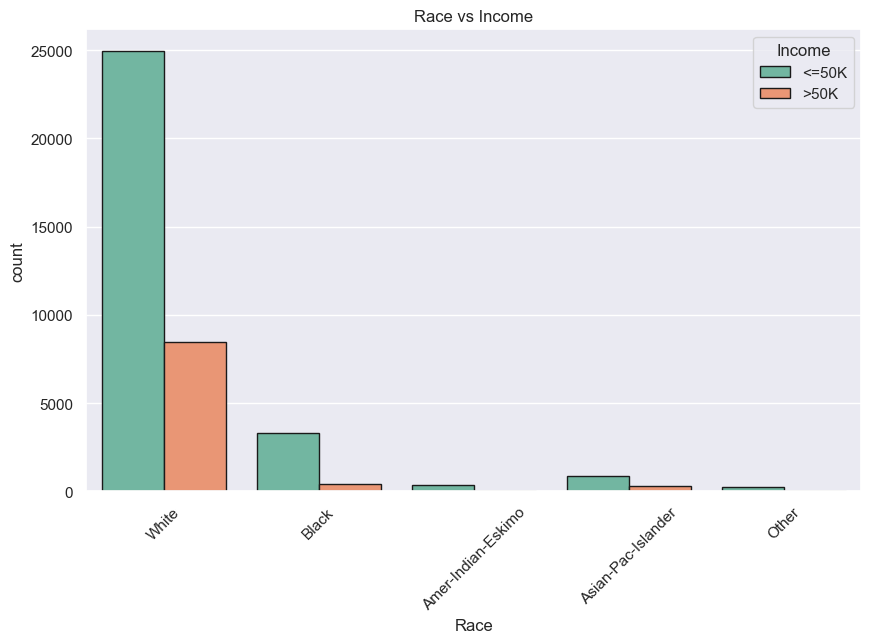

In [39]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=train, x='race', hue='income', edgecolor='k', palette='Set2')
ax.set_title('Race vs Income')
ax.set_xlabel('Race')
plt.xticks(rotation=45)
plt.legend(title='Income', labels=['<=50K', '>50K'])
plt.show()

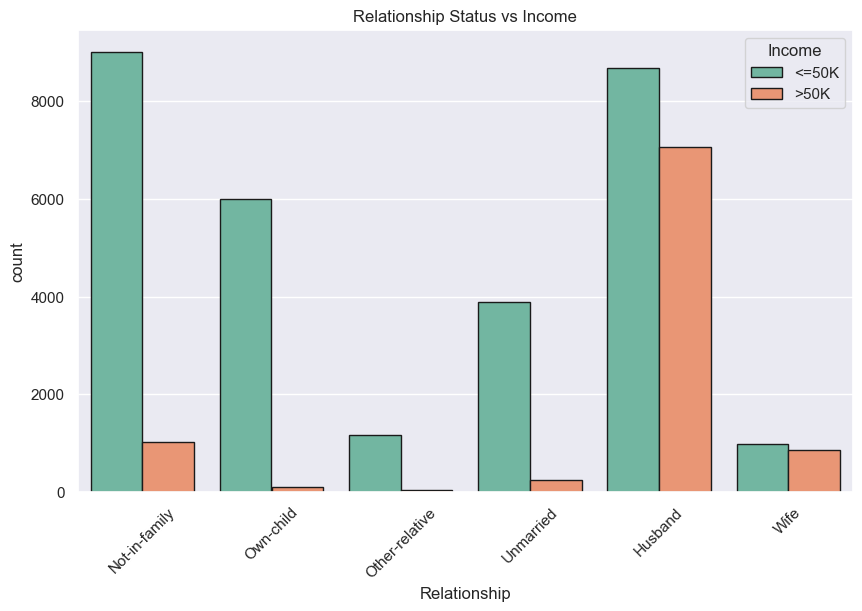

In [40]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=train, x='relationship', hue='income', edgecolor='k', palette='Set2')
ax.set_title('Relationship Status vs Income')
ax.set_xlabel('Relationship')
plt.xticks(rotation=45)
plt.legend(title='Income', labels=['<=50K', '>50K'])
plt.show()

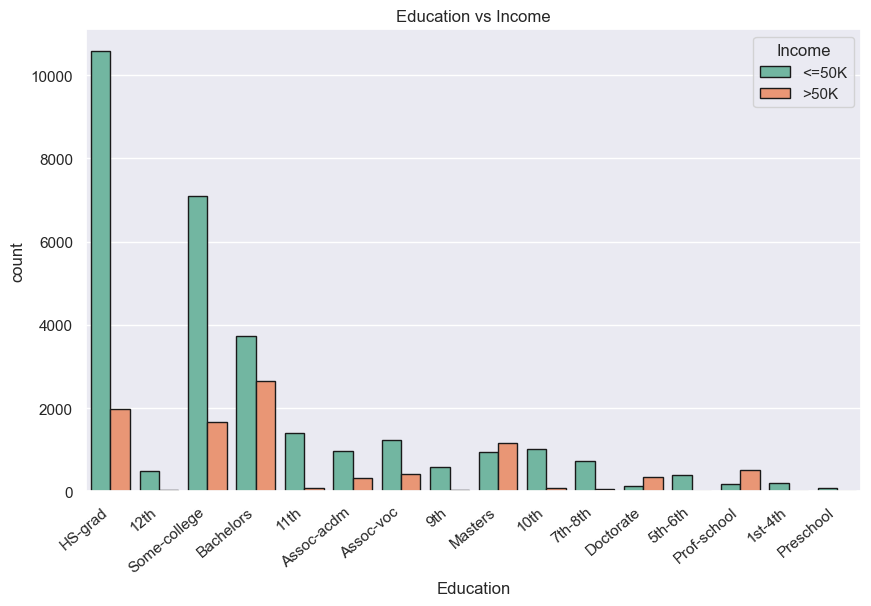

In [41]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=train, x='education', hue='income', edgecolor='k', palette='Set2')
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
ax.set_title('Education vs Income')
ax.set_xlabel('Education')
plt.legend(title='Income', labels=['<=50K', '>50K'])
plt.show()

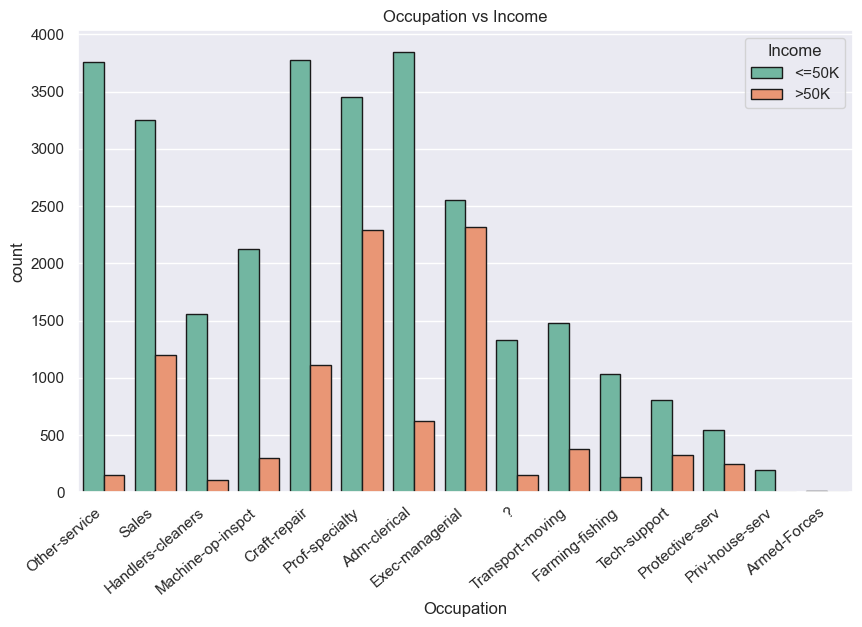

In [42]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=train, x='occupation', hue='income', edgecolor='k', palette='Set2')
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
ax.set_title('Occupation vs Income')
ax.set_xlabel('Occupation')
plt.legend(title='Income', labels=['<=50K', '>50K'])
plt.show()

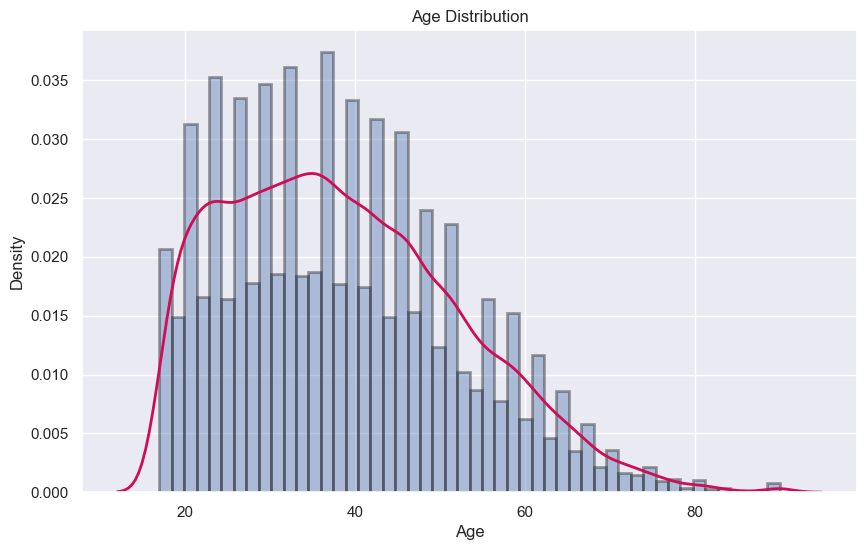

In [43]:
plt.figure(figsize=(10, 6))
ax = sns.distplot(train['age'], hist_kws=dict(edgecolor="k", linewidth=2), kde_kws={"color": "#ce0d55", "lw": 2})
ax.set_title('Age Distribution')
ax.set_xlabel('Age')
plt.show()

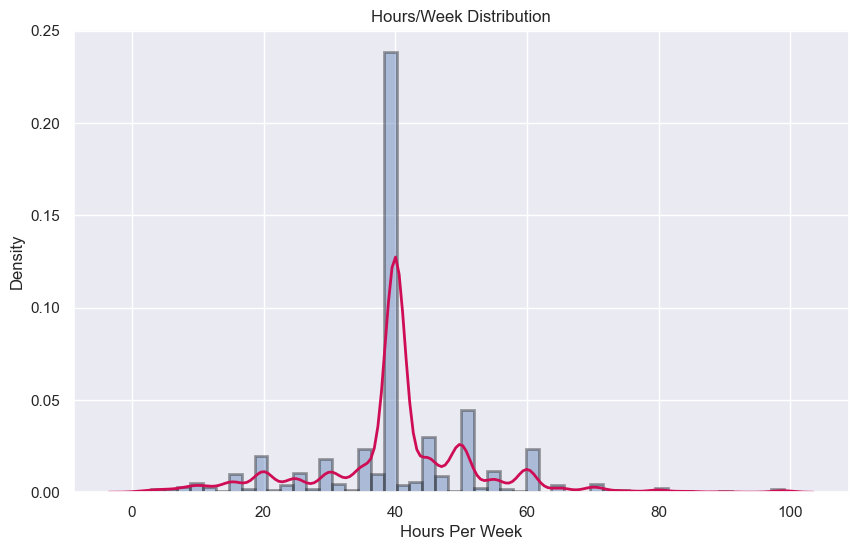

In [44]:
plt.figure(figsize=(10, 6))
ax = sns.distplot(train['hours-per-week'], hist_kws=dict(edgecolor="k", linewidth=2), kde_kws={"color": "#ce0d55", "lw": 2})
ax.set_title('Hours/Week Distribution')
ax.set_xlabel('Hours Per Week')
plt.show()

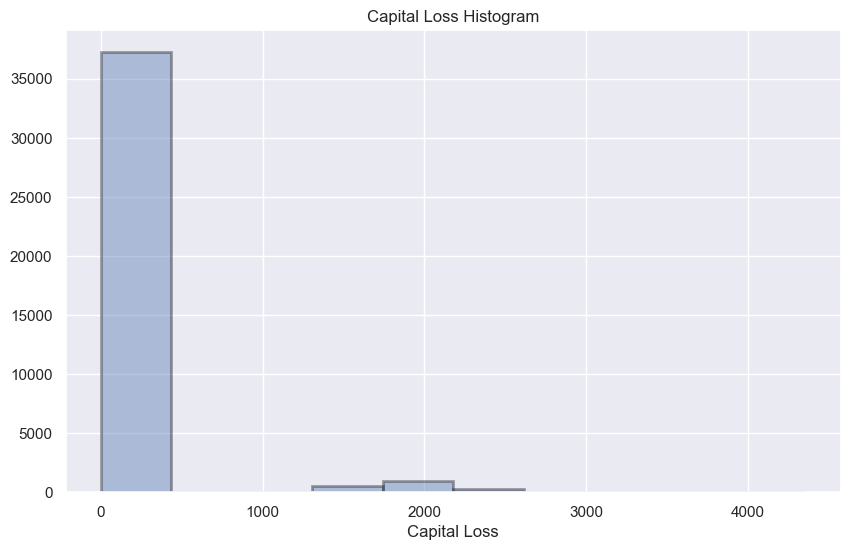

In [45]:
plt.figure(figsize=(10, 6))
ax = sns.distplot(train['capital-loss'], bins=10, kde=False, hist_kws=dict(edgecolor="k", linewidth=2))
ax.set_title('Capital Loss Histogram')
ax.set_xlabel('Capital Loss')
plt.show()

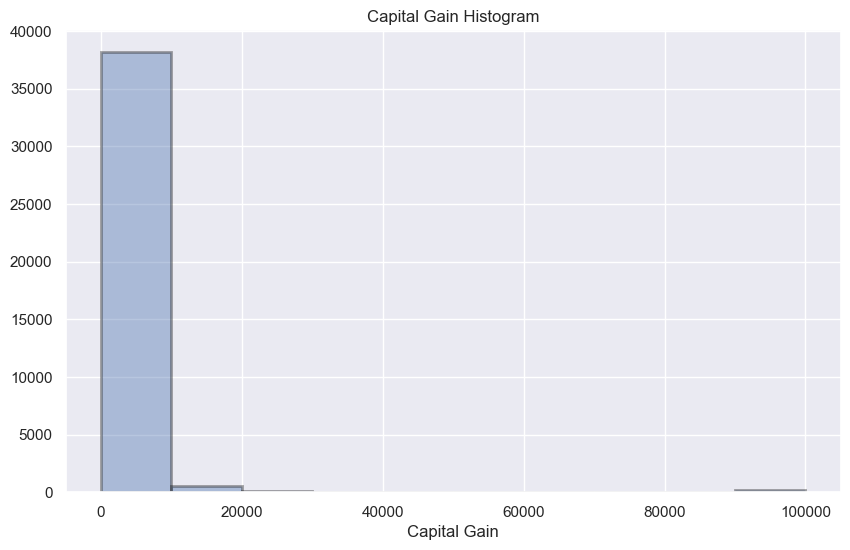

In [46]:
plt.figure(figsize=(10, 6))
ax = sns.distplot(train['capital-gain'], bins=10, kde=False, hist_kws=dict(edgecolor="k", linewidth=2))
ax.set_title('Capital Gain Histogram')
ax.set_xlabel('Capital Gain')
plt.show()

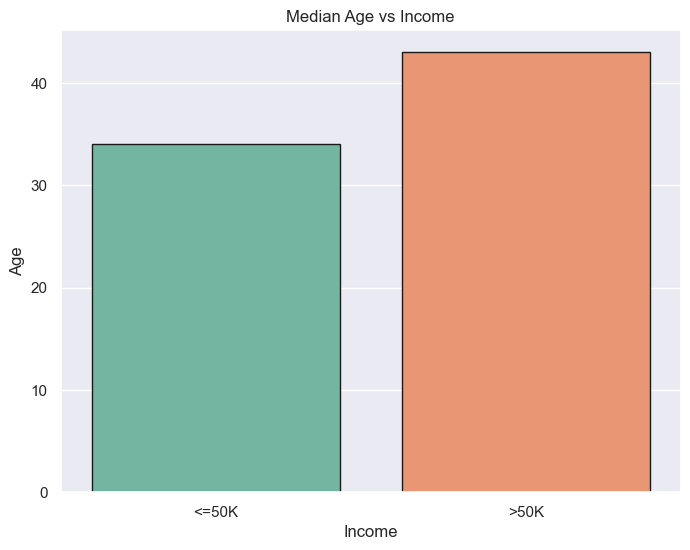

In [47]:
plt.figure(figsize=(8, 6))
ax = sns.barplot(x=train.groupby('income')['age'].median().index, y=train.groupby('income')['age'].median().values,
                edgecolor='k', palette='Set2')
ax.set_ylabel('Age')
ax.set_xlabel('Income')
ax.set_title('Median Age vs Income')
plt.show()

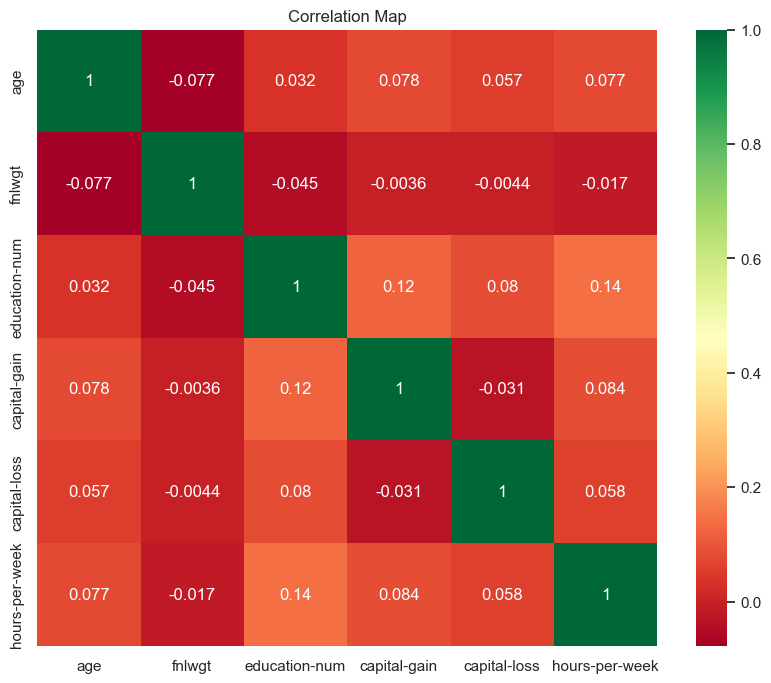

In [48]:
corr_train = df_train_num
plt.figure(figsize=(10, 8))
ax = sns.heatmap(corr_train.corr(), cmap='RdYlGn', annot=True)
ax.set_title('Correlation Map')
plt.show()

<a id="4"></a> <br>
## Step 4: Data Preparation

The variable `marital-status` has seven levels. We need to convert these levels into integer. Similarly we need to convert the categorical variables to numeric.

For this, we will use something called `dummy variables`.

In [49]:
categorical_features = [feature for feature in train.columns if train[feature].dtype == 'O' and feature != 'income']

for feature in categorical_features:
    freq = train[feature].value_counts().reset_index().rename(columns={feature: 'frequency', 'index': feature})
    print('\n')
    print(freq)




          workclass  frequency
0  Private           27862    
1  Self-emp-not-inc  3088     
2  Local-gov         2518     
3  State-gov         1579     
4  ?                 1484     
5  Self-emp-inc      1360     
6  Federal-gov       1140     
7  Without-pay       16       
8  Never-worked      7        


       education  frequency
0   HS-grad       12554    
1   Some-college  8753     
2   Bachelors     6388     
3   Masters       2125     
4   Assoc-voc     1641     
5   11th          1486     
6   Assoc-acdm    1286     
7   10th          1082     
8   7th-8th       780      
9   Prof-school   668      
10  9th           617      
11  12th          522      
12  Doctorate     485      
13  5th-6th       402      
14  1st-4th       193      
15  Preschool     72       


          marital-status  frequency
0  Married-civ-spouse     17859    
1  Never-married          12875    
2  Divorced               5310     
3  Separated              1253     
4  Widowed                12

In [50]:
#convert <=50K and >50K to 0, 1 respectively
encoder = LabelEncoder()
train['income'] = encoder.fit_transform(train['income'])

In [51]:
#transform country feature to be 1 if country is the United States. Otherwise is equal to 0
train['native-country'] = np.where(train['native-country'] == ' United-States', 1, 0)

In [52]:
#transform marital status and concatenate some classes to reduce distinct classes
train['marital-status'] = train['marital-status'].replace({'Married-civ-spouse': 'Married',
                                                                 'Never-married': 'Single',
                                                               'Separated': 'Divorced',
                                                                 'Married-spouse-absent': 'Divorced',
                                                               'Divorced': 'Divorced',
                                                                 'Married-AF-spouse': 'Divorced',
                                                                 'Widowed': 'Widowed'})


In [53]:
#transform workclass feature to be 1 if the workclass is Private and 0 if doesn't
train['workclass'] = np.where(train['workclass'] == ' Private', 1, 0)

In [54]:
#transform workclass feature to be 1 if the Sex is Male and 0 if doesn't
train['sex'] = np.where(train['sex'] == ' Male', 1, 0)

In [55]:
#transform workclass feature to be 1 if the Race is White and 0 if doesn't
train['race'] = np.where(train['race'] == ' White', 1, 0)

In [56]:
#create ordered label for education 
education_mapping={'Preschool':0,'1st-4th':1,'5th-6th':2,'7th-8th':3,'9th':4,'10th':5,
                   '11th':6,'12th':7,'HS-grad':8,'Some-college':0,'Assoc-acdm':10,
                   'Assoc-voc':11, 'Bachelors':12, 'Prof-school':13, 'Masters':14,'Doctorate':15
                   }
train['education']=train['education'].map(education_mapping)

In [57]:
relationship_ordered = train.groupby(['relationship'])['income'].count().sort_values().index
relationship_ordered = {k: i for i, k in enumerate(relationship_ordered, 0)}
train['relationship'] = train['relationship'].map(relationship_ordered)

In [58]:
occupation_ordered = train.groupby(['occupation'])['income'].count().sort_values().index
occupation_ordered = {k: i for i, k in enumerate(occupation_ordered, 0)}
train['occupation'] = train['occupation'].map(occupation_ordered)

In [59]:
marital_ordered = train.groupby(['marital-status'])['income'].count().sort_values().index
marital_ordered = {k: i for i, k in enumerate(marital_ordered, 0)}
train['marital-status'] = train['marital-status'].map(marital_ordered)

In [60]:
train.head(10)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
7762,18,0,423024,8,9,2,9,4,0,0,0,0,20,0,0
23881,17,0,178953,7,8,2,10,3,0,0,0,0,20,0,0
30507,25,0,348986,8,9,2,6,0,0,0,0,0,40,0,0
28911,20,0,218215,0,10,2,10,3,0,0,0,0,30,0,0
19484,47,0,244025,8,9,2,8,2,0,0,0,0,56,0,0
43031,33,0,399531,12,13,3,13,5,0,0,0,0,40,0,0
28188,38,0,200220,8,9,3,13,5,0,0,0,0,40,0,0
12761,21,0,329530,6,7,3,13,5,0,0,0,0,40,0,0
40834,43,0,282155,10,12,1,14,4,0,0,4650,0,40,0,0
27875,55,0,202220,8,9,3,9,1,0,0,2407,0,35,0,0


In [61]:
train.drop('fnlwgt',axis=1,inplace=True) # it is not a useful feature for predicting the wage class

* The `fnlwgt` column represents a sample weight used in surveys and is unrelated to an individual's income, making it irrelevant for predicting wage class.

In [62]:
# Checking missing value again

train[train.isna().any(axis=1)]

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income


In [63]:
train['income'].value_counts()

0    29709
1    9345 
Name: income, dtype: int64

#### Test Set

In [64]:
categorical_features = [feature for feature in test.columns if test[feature].dtype == 'O' and feature != 'income']

for feature in categorical_features:
    freq = test[feature].value_counts().reset_index().rename(columns={feature: 'frequency', 'index': feature})
    print('\n')
    print(freq)




          workclass  frequency
0  Private           6988     
1  Self-emp-not-inc  773      
2  Local-gov         618      
3  State-gov         402      
4  ?                 352      
5  Self-emp-inc      335      
6  Federal-gov       292      
7  Without-pay       5        
8  Never-worked      3        


       education  frequency
0   HS-grad       3225     
1   Some-college  2120     
2   Bachelors     1632     
3   Masters       531      
4   Assoc-voc     419      
5   11th          326      
6   Assoc-acdm    315      
7   10th          307      
8   7th-8th       174      
9   Prof-school   166      
10  9th           139      
11  12th          135      
12  Doctorate     109      
13  5th-6th       106      
14  1st-4th       53       
15  Preschool     11       


          marital-status  frequency
0  Married-civ-spouse     4515     
1  Never-married          3230     
2  Divorced               1320     
3  Widowed                289      
4  Separated              27

In [65]:
#convert <=50K and >50K to 0, 1 respectively
encoder = LabelEncoder()
test['income'] = encoder.fit_transform(test['income'])

In [66]:
#transform country feature to be 1 if country is the United States. Otherwise is equal to 0
test['native-country'] = np.where(test['native-country'] == ' United-States', 1, 0)

In [67]:
#transform marital status and concatenate some classes to reduce distinct classes
test['marital-status'] = test['marital-status'].replace({'Married-civ-spouse': 'Married',
                                                                 'Never-married': 'Single',
                                                               'Separated': 'Divorced',
                                                                 'Married-spouse-absent': 'Divorced',
                                                               'Divorced': 'Divorced',
                                                                 'Married-AF-spouse': 'Divorced',
                                                                 'Widowed': 'Widowed'})


In [68]:
#transform workclass feature to be 1 if the workclass is Private and 0 if doesn't
test['workclass'] = np.where(test['workclass'] == ' Private', 1, 0)

In [69]:
#transform workclass feature to be 1 if the Sex is Male and 0 if doesn't
test['sex'] = np.where(test['sex'] == ' Male', 1, 0)

In [70]:
#transform workclass feature to be 1 if the Race is White and 0 if doesn't
test['race'] = np.where(test['race'] == ' White', 1, 0)

In [71]:
#create ordered label for education 
education_mapping={'Preschool':0,'1st-4th':1,'5th-6th':2,'7th-8th':3,'9th':4,'10th':5,
                   '11th':6,'12th':7,'HS-grad':8,'Some-college':0,'Assoc-acdm':10,
                   'Assoc-voc':11, 'Bachelors':12, 'Prof-school':13, 'Masters':14,'Doctorate':15
                   }
test['education']=test['education'].map(education_mapping)

In [72]:
relationship_ordered = test.groupby(['relationship'])['income'].count().sort_values().index
relationship_ordered = {k: i for i, k in enumerate(relationship_ordered, 0)}
test['relationship'] = test['relationship'].map(relationship_ordered)

In [73]:
occupation_ordered = test.groupby(['occupation'])['income'].count().sort_values().index
occupation_ordered = {k: i for i, k in enumerate(occupation_ordered, 0)}
test['occupation'] = test['occupation'].map(occupation_ordered)

In [74]:
marital_ordered = test.groupby(['marital-status'])['income'].count().sort_values().index
marital_ordered = {k: i for i, k in enumerate(marital_ordered, 0)}
test['marital-status'] = test['marital-status'].map(marital_ordered)

In [75]:
test.head(10)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
2,38,0,215646,8,9,1,6,4,0,0,0,0,40,0,0
9,42,0,159449,12,13,3,12,5,0,0,5178,0,40,0,1
10,37,0,280464,0,10,3,12,5,0,0,0,0,80,0,1
12,23,0,122272,12,13,2,11,3,0,0,0,0,30,0,0
16,25,0,176756,8,9,2,4,3,0,0,0,0,35,0,0
21,54,0,302146,8,9,1,9,2,0,0,0,0,20,0,0
28,39,0,367260,8,9,1,12,4,0,0,0,0,80,0,0
48,41,0,101603,11,11,3,13,5,0,0,0,0,40,0,0
55,43,0,237993,0,10,3,3,5,0,0,0,0,40,0,1
60,30,0,59496,12,13,3,10,5,0,0,2407,0,40,0,0


In [76]:
test.drop('fnlwgt',axis=1,inplace=True) # it is not a useful feature for predicting the wage class

In [77]:
# Checking missing value again

test[test.isna().any(axis=1)]

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income


In [78]:
test['income'].value_counts()

0    7426
1    2342
Name: income, dtype: int64

<a id="5"></a> <br>
## Step 5: Splitting the Data into Training and Testing Sets

As we know, the first basic step for regression is performing a train-test split.

In [79]:
#scaling the train set with StandardScaler
scaler=StandardScaler()
scaled_features_train=scaler.fit_transform(train.drop('income',axis=1))
scaled_features_train=pd.DataFrame(scaled_features_train, columns=train.drop('income',axis=1).columns)

In [80]:
#undersampling the train set
from imblearn.under_sampling import OneSidedSelection
from imblearn.over_sampling import SMOTE
under=OneSidedSelection()
X_train_res, y_train_res=under.fit_resample(scaled_features_train, train['income'])


#oversampling the train set
sm=SMOTE()
X_train_res, y_train_res= sm.fit_resample(X_train_res, y_train_res)

X_train_res=pd.DataFrame(X_train_res, columns=train.drop('income',axis=1).columns)



#creating the final train 
final_train=pd.concat([X_train_res, y_train_res],axis=1)

In [81]:
final_train.head(10)

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,0.0262,0.0000,0.1927,-0.4179,0.9281,-0.0029,0.9042,0.0000,0.0000,-0.1439,-0.2166,-0.0352,0.0000,0
1,-1.5055,0.0000,0.1927,-0.4179,-0.2509,-0.3083,0.1686,0.0000,0.0000,-0.1439,-0.2166,-1.6477,0.0000,0
2,-1.5784,0.0000,-0.0227,-0.8063,-0.2509,-0.0029,-0.5671,0.0000,0.0000,-0.1439,-0.2166,-1.6477,0.0000,0
3,-0.9949,0.0000,0.1927,-0.4179,-0.2509,-1.2246,-2.7741,0.0000,0.0000,-0.1439,-0.2166,-0.0352,0.0000,0
4,-1.3596,0.0000,-1.5301,-0.0296,-0.2509,-0.0029,-0.5671,0.0000,0.0000,-0.1439,-0.2166,-0.8415,0.0000,0
5,0.6097,0.0000,0.1927,-0.4179,-0.2509,-0.6137,-1.3027,0.0000,0.0000,-0.1439,-0.2166,1.2548,0.0000,0
6,-0.4114,0.0000,1.0541,1.1356,0.9281,0.9134,0.9042,0.0000,0.0000,-0.1439,-0.2166,-0.0352,0.0000,0
7,-0.0467,0.0000,0.1927,-0.4179,0.9281,0.9134,0.9042,0.0000,0.0000,-0.1439,-0.2166,-0.0352,0.0000,0
8,-1.2866,0.0000,-0.2380,-1.1947,0.9281,0.9134,0.9042,0.0000,0.0000,-0.1439,-0.2166,-0.0352,0.0000,0
9,0.3180,0.0000,0.6234,0.7472,-1.4298,1.2189,0.1686,0.0000,0.0000,0.4700,-0.2166,-0.0352,0.0000,0


In [82]:
final_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57428 entries, 0 to 57427
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             57428 non-null  float64
 1   workclass       57428 non-null  float64
 2   education       57428 non-null  float64
 3   education-num   57428 non-null  float64
 4   marital-status  57428 non-null  float64
 5   occupation      57428 non-null  float64
 6   relationship    57428 non-null  float64
 7   race            57428 non-null  float64
 8   sex             57428 non-null  float64
 9   capital-gain    57428 non-null  float64
 10  capital-loss    57428 non-null  float64
 11  hours-per-week  57428 non-null  float64
 12  native-country  57428 non-null  float64
 13  income          57428 non-null  int64  
dtypes: float64(13), int64(1)
memory usage: 6.1 MB


In [83]:
final_train['income'].value_counts() #now train set is balanced

0    28714
1    28714
Name: income, dtype: int64

#### Test Set

In [84]:
scaled_features_test = scaler.transform(test.drop('income', axis=1))
scaled_features_test = pd.DataFrame(scaled_features_test, columns=test.drop('income', axis=1).columns)
X = pd.DataFrame(test['income'])
X.reset_index(inplace=True, drop=True)
final_test = pd.concat([scaled_features_test, X], axis=1)

In [85]:
final_test.head(10)

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,-0.0467,0.0000,0.1927,-0.4179,-1.4298,-1.2246,0.1686,0.0000,0.0000,-0.1439,-0.2166,-0.0352,0.0000,0
1,0.2450,0.0000,1.0541,1.1356,0.9281,0.6080,0.9042,0.0000,0.0000,0.5397,-0.2166,-0.0352,0.0000,1
2,-0.1197,0.0000,-1.5301,-0.0296,0.9281,0.6080,0.9042,0.0000,0.0000,-0.1439,-0.2166,3.1897,0.0000,1
3,-1.1408,0.0000,1.0541,1.1356,-0.2509,0.3026,-0.5671,0.0000,0.0000,-0.1439,-0.2166,-0.8415,0.0000,0
4,-0.9949,0.0000,0.1927,-0.4179,-0.2509,-1.8355,-0.5671,0.0000,0.0000,-0.1439,-0.2166,-0.4384,0.0000,0
5,1.1203,0.0000,0.1927,-0.4179,-1.4298,-0.3083,-1.3027,0.0000,0.0000,-0.1439,-0.2166,-1.6477,0.0000,0
6,0.0262,0.0000,0.1927,-0.4179,-1.4298,0.6080,0.1686,0.0000,0.0000,-0.1439,-0.2166,3.1897,0.0000,0
7,0.1721,0.0000,0.8387,0.3588,0.9281,0.9134,0.9042,0.0000,0.0000,-0.1439,-0.2166,-0.0352,0.0000,0
8,0.3180,0.0000,-1.5301,-0.0296,0.9281,-2.1409,0.9042,0.0000,0.0000,-0.1439,-0.2166,-0.0352,0.0000,1
9,-0.6302,0.0000,1.0541,1.1356,0.9281,-0.0029,0.9042,0.0000,0.0000,0.1739,-0.2166,-0.0352,0.0000,0


In [86]:
# Checking missing value again

train[train.isna().any(axis=1)]

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income


In [87]:
# Checking missing value again

test[test.isna().any(axis=1)]

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income


<a id="6"></a> <br>
## Step 6: Building a Linear Model

In [88]:
X=final_train.drop('income',axis=1)
y=final_train['income']

In [89]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)

### Model Selection

#### Logistic Regression

In [90]:
from sklearn.model_selection import cross_val_score

# Create a logistic regression model
logReg = LogisticRegression()

# Perform 5-fold cross-validation with parallel processing
# The 'cv' parameter specifies the number of folds, and 'n_jobs' uses parallel processing
score_logReg = cross_val_score(logReg, X, y, cv=5, n_jobs=-1)

# Analyze the cross-validation results
mean_score = score_logReg.mean()
std_deviation = score_logReg.std()

# Print the mean score and standard deviation to assess model performance
print("Mean Score:", mean_score)
print("Standard Deviation:", std_deviation)

Mean Score: 0.8134707073880177
Standard Deviation: 0.004124538233518913


### KNN

In [91]:
from sklearn.neighbors import KNeighborsClassifier

# Create a KNN classifier
knn = KNeighborsClassifier()

# Perform 5-fold cross-validation with parallel processing
# The 'cv' parameter specifies the number of folds, and 'n_jobs' uses parallel processing
score_knn = cross_val_score(knn, X, y, cv=5, n_jobs=-1)

# Analyze the cross-validation results
mean_score = score_knn.mean()
std_deviation = score_knn.std()

# Print the mean score and standard deviation to assess KNN model performance
print("KNN Mean Score:", mean_score)
print("KNN Standard Deviation:", std_deviation)

KNN Mean Score: 0.8509438978579741
KNN Standard Deviation: 0.008068334481217283


### Random Forest

In [92]:
from sklearn.ensemble import RandomForestClassifier

# Create a Random Forest classifier
rf = RandomForestClassifier()

# Perform 5-fold cross-validation with parallel processing
# The 'cv' parameter specifies the number of folds, and 'n_jobs' uses parallel processing
score_rf = cross_val_score(rf, X, y, cv=5, n_jobs=-1)

# Analyze the cross-validation results
mean_score = score_rf.mean()
std_deviation = score_rf.std()

# Print the mean score and standard deviation to assess Random Forest model performance
print("Random Forest Mean Score:", mean_score)
print("Random Forest Standard Deviation:", std_deviation)

Random Forest Mean Score: 0.8884524181962998
Random Forest Standard Deviation: 0.03173851194166672


#### Naive Bayes

In [93]:
from sklearn.naive_bayes import GaussianNB

# Create a Gaussian Naive Bayes classifier
naive_bayes = GaussianNB()

# Perform 5-fold cross-validation with parallel processing
# The 'cv' parameter specifies the number of folds, and 'n_jobs' uses parallel processing
score_naive_bayes = cross_val_score(naive_bayes, X, y, cv=5, n_jobs=-1)

# Analyze the cross-validation results
mean_score = score_naive_bayes.mean()
std_deviation = score_naive_bayes.std()

# Print the mean score and standard deviation to assess Naive Bayes model performance
print("Naive Bayes Mean Score:", mean_score)
print("Naive Bayes Standard Deviation:", std_deviation)

Naive Bayes Mean Score: 0.6987007514059439
Naive Bayes Standard Deviation: 0.005653976994567094


#### Linear Discriminant Analysis (LDA)

In [94]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Create a Linear Discriminant Analysis (LDA) classifier
lda = LinearDiscriminantAnalysis()

# Perform 5-fold cross-validation with parallel processing
# The 'cv' parameter specifies the number of folds, and 'n_jobs' uses parallel processing
score_lda = cross_val_score(lda, X, y, cv=5, n_jobs=-1)

# Analyze the cross-validation results for LDA
mean_score = score_lda.mean()
std_deviation = score_lda.std()

# Print the mean score and standard deviation to assess LDA model performance
print("LDA Mean Score:", mean_score)
print("LDA Standard Deviation:", std_deviation)

LDA Mean Score: 0.8045203871442821
LDA Standard Deviation: 0.004867005474319203


### Quadratic Discriminant Analysis (QDA)

In [95]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

# Create a Quadratic Discriminant Analysis (QDA) classifier
qda = QuadraticDiscriminantAnalysis()

# Perform 5-fold cross-validation with parallel processing
# The 'cv' parameter specifies the number of folds, and 'n_jobs' uses parallel processing
score_qda = cross_val_score(qda, X, y, cv=5, n_jobs=-1)

# Analyze the cross-validation results for QDA
mean_score = score_qda.mean()
std_deviation = score_qda.std()

# Print the mean score and standard deviation to assess QDA model performance
print("QDA Mean Score:", mean_score)
print("QDA Standard Deviation:", std_deviation)

QDA Mean Score: 0.4999999999999999
QDA Standard Deviation: 2.7533980497753527e-05


/Users/sonugupta/anaconda3/lib/python3.11/site-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/Users/sonugupta/anaconda3/lib/python3.11/site-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/Users/sonugupta/anaconda3/lib/python3.11/site-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/Users/sonugupta/anaconda3/lib/python3.11/site-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/Users/sonugupta/anaconda3/lib/python3.11/site-packages/sklearn/discriminant_analysis.py:951: RuntimeWarning: divide by zero encountered in power
  X2 = np.dot(Xm, R * (S ** (-0.5)))
/Users/sonugupta/anaconda3/lib/python3.11/site-packages/sklearn/discriminant_analysis.py:951: RuntimeWarning: invalid val

In [96]:
model_scores = {
    'Model': ['Logistic Regression', 'KNN', 'Random Forest', 'Naive Bayes', 'LDA', 'QDA'],
    'Accuracy': [
        score_logReg.mean(),
        score_knn.mean(),
        score_rf.mean(),
        score_naive_bayes.mean(),
        score_lda.mean(),
        score_qda.mean()
    ]
}

# Create a DataFrame
scores = pd.DataFrame(model_scores)

In [97]:
# Comparing all classifier
print(scores)

                 Model  Accuracy
0  Logistic Regression 0.8135   
1  KNN                 0.8509   
2  Random Forest       0.8885   
3  Naive Bayes         0.6987   
4  LDA                 0.8045   
5  QDA                 0.5000   


<a id="7"></a> <br>
## Step 7: Final Model Evaluation

In [98]:
# Final train
X_train=final_train.drop('income',axis=1)
y_train=final_train['income']

# Final test
X_test=final_test.drop('income',axis=1)
y_test=final_test['income']

#### Random Forest

In [99]:
# Create and fit a Random Forest classifier on the training data
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

In [100]:
report = classification_report(y_test, y_pred)

print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.87      0.89      7426
           1       0.63      0.71      0.67      2342

    accuracy                           0.83      9768
   macro avg       0.77      0.79      0.78      9768
weighted avg       0.84      0.83      0.83      9768



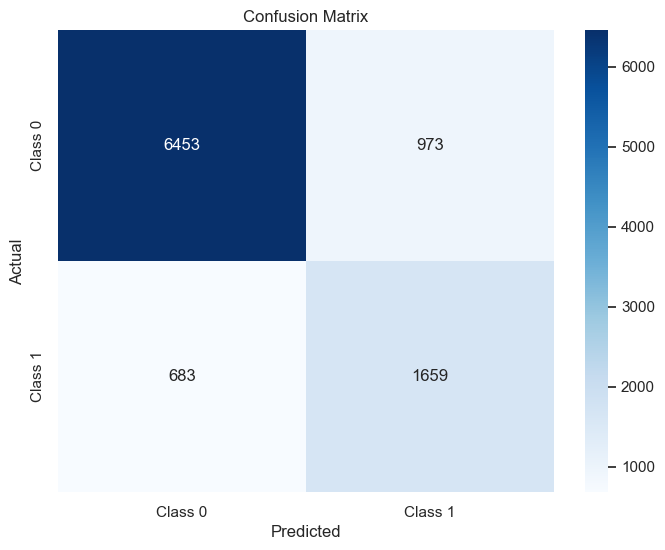

In [101]:
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [102]:
RandomForest_auc=roc_auc_score(y_test,y_pred)
r_probs = [0 for _ in range(len(y_test))]
random_auc = roc_auc_score(y_test, r_probs)
print(RandomForest_auc)

0.788671395514594


In [103]:
probs=rf.predict_proba(X_test)

In [104]:
probs=probs[:,1] #keep probabilities for one class

In [105]:
r_fpr, r_tpr, _=roc_curve(y_test,probs)
x=np.arange(0,1.01,0.01)

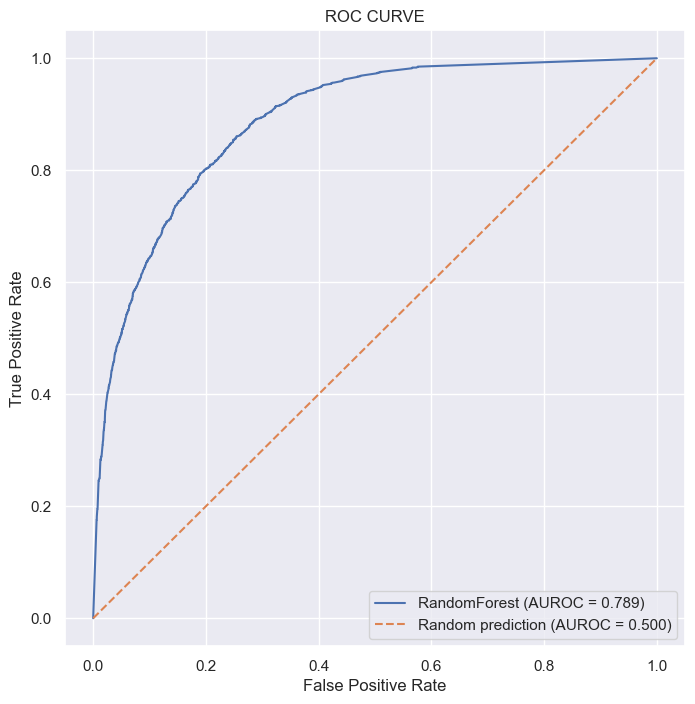

In [106]:
plt.plot(r_fpr, r_tpr, label='RandomForest (AUROC = %0.3f)' % RandomForest_auc)
plt.plot(x,x, linestyle='--', label='Random prediction (AUROC = %0.3f)' % random_auc)
plt.legend()
plt.title('ROC CURVE')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

#### KNN

In [107]:
# Create and fit a KNN classifier on the training data
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

In [108]:
print("Classification Report:")
print(classification_report(y_test,y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.82      0.86      7426
           1       0.56      0.73      0.63      2342

    accuracy                           0.80      9768
   macro avg       0.73      0.77      0.75      9768
weighted avg       0.82      0.80      0.81      9768



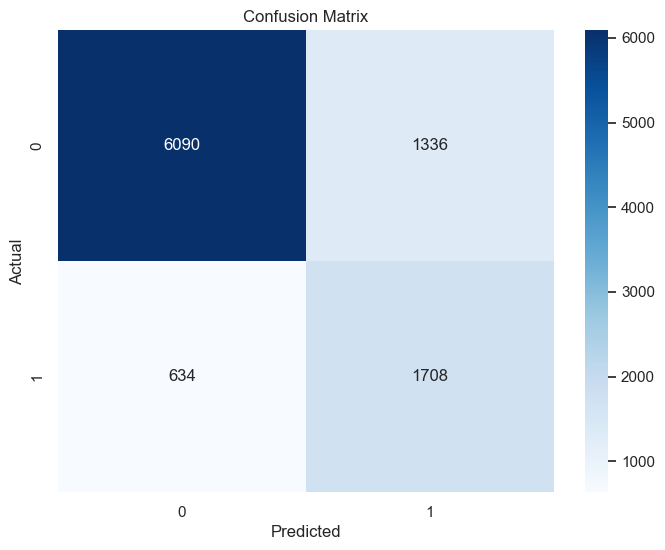

In [109]:
# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [110]:
KNN_auc=roc_auc_score(y_test,y_pred)
r_probs = [0 for _ in range(len(y_test))]
random_auc = roc_auc_score(y_test, r_probs)
print(KNN_auc)

0.7746913871289809


In [111]:
probs=knn.predict_proba(X_test)

In [112]:
probs=probs[:,1] #keep probabilities for one class

In [113]:
r_fpr, r_tpr, _=roc_curve(y_test,probs)
x=np.arange(0,1.01,0.01)

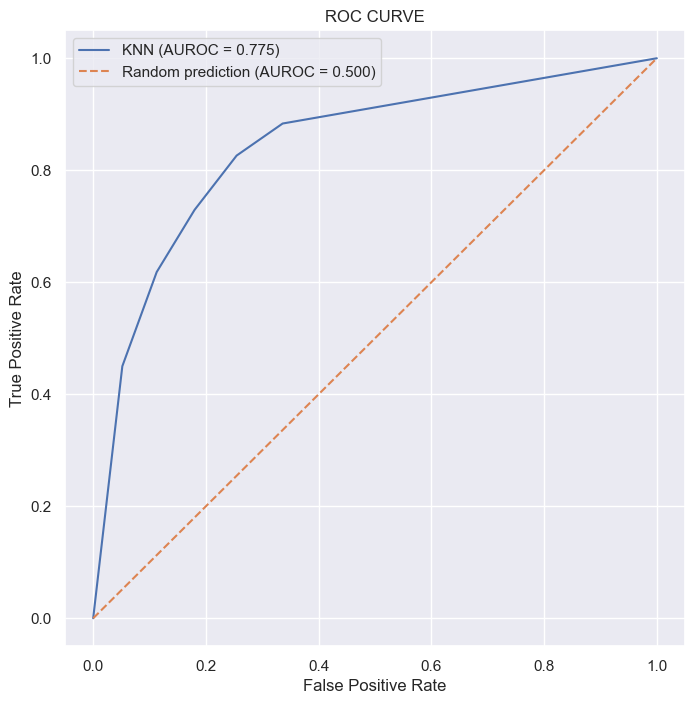

In [114]:
plt.plot(r_fpr, r_tpr, label='KNN (AUROC = %0.3f)' % KNN_auc)
plt.plot(x,x, linestyle='--', label='Random prediction (AUROC = %0.3f)' % random_auc)
plt.legend()
plt.title('ROC CURVE')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

#### Logistic Regression

In [115]:
# Create and fit a Logistics Regression classifier on the training data
logReg = LogisticRegression()
logReg.fit(X_train, y_train)
y_pred = logReg.predict(X_test)

In [116]:
print("Classification Report:")
print(classification_report(y_test,y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.78      0.85      7426
           1       0.55      0.83      0.66      2342

    accuracy                           0.79      9768
   macro avg       0.74      0.81      0.76      9768
weighted avg       0.84      0.79      0.81      9768



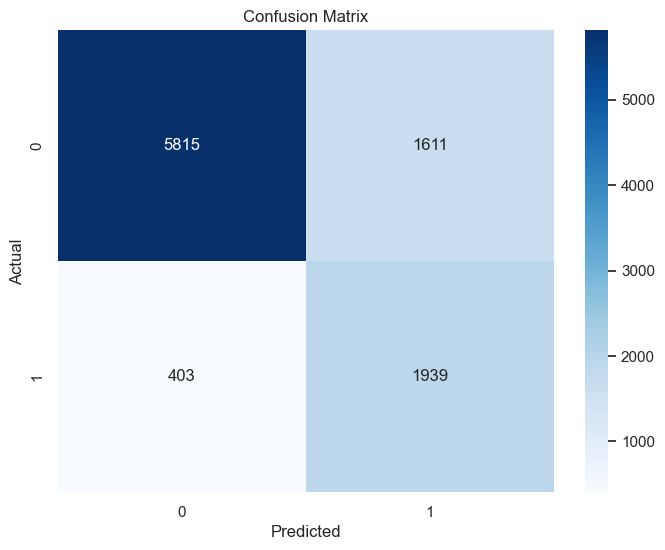

In [117]:
# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [118]:
logReg_auc=roc_auc_score(y_test,y_pred)
r_probs = [0 for _ in range(len(y_test))]
random_auc = roc_auc_score(y_test, r_probs)
print(logReg_auc)

0.8054921855791835


In [119]:
probs=knn.predict_proba(X_test)

In [120]:
probs=probs[:,1] #keep probabilities for one class

In [121]:
r_fpr, r_tpr, _=roc_curve(y_test,probs)
x=np.arange(0,1.01,0.01)

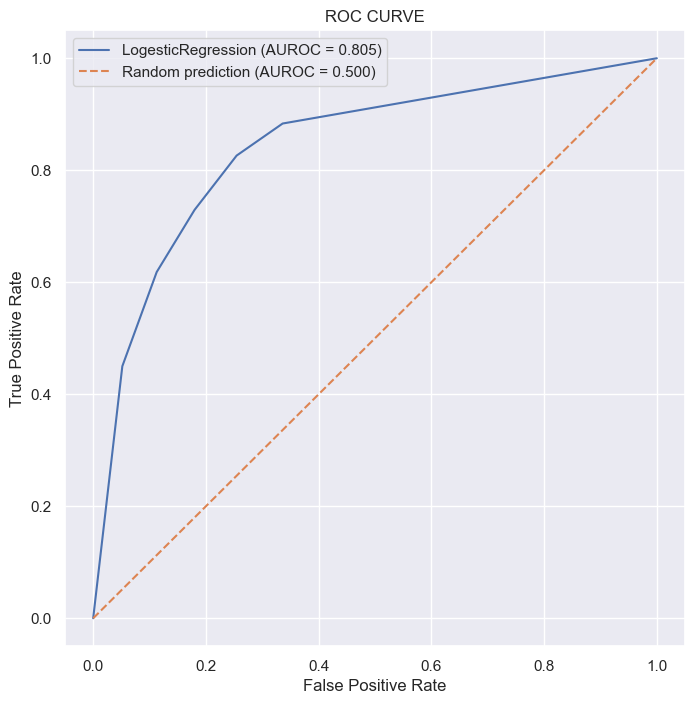

In [122]:
plt.plot(r_fpr, r_tpr, label='LogesticRegression (AUROC = %0.3f)' % logReg_auc)
plt.plot(x,x, linestyle='--', label='Random prediction (AUROC = %0.3f)' % random_auc)
plt.legend()
plt.title('ROC CURVE')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

### Closing Statement:
- Logistic Regression is performing better on the test dataset compared to others.
- Random Forest is performing better on the training dataset compared to others.